#### Is the MSTI hit rate high?

Prepared by: Grace Patlewicz <br>
Created: 29 January 2023 <br>
Evaluating the MSTI hit rate relative to Tox21 viability assays and the chemical level hit rates for Tox21 chemicals in general

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(external_dir+'MSTI_hitrate_summaries_25Jan2023.xlsx', sheet_name = 'Tox21 Viability Assay Hit Rate' )

In [4]:
df

,aeid,aenm,total.chem.screened,active.chem.count,inactive.chem.count,active.percent,inactive.percent
0,2099,TOX21_RT_HEPG2_FLO_40hr_ctrl_viability,9667,2525,7142,26.12,73.88
1,2093,TOX21_RT_HEK293_GLO_40hr_viability,9667,2344,7323,24.25,75.75
2,2091,TOX21_RT_HEK293_GLO_32hr_viability,9667,2284,7383,23.63,76.37
3,2089,TOX21_RT_HEK293_GLO_24hr_viability,9667,2229,7438,23.06,76.94
4,2098,TOX21_RT_HEPG2_FLO_32hr_ctrl_viability,9667,2227,7440,23.04,76.96
...,...,...,...,...,...,...,...
80,2062,TOX21_HDAC_Inhibition_viability,9667,256,9411,2.65,97.35
81,2084,TOX21_RT_HEK293_GLO_00hr_viability,9667,214,9453,2.21,97.79
82,2221,TOX21_PR_BLA_Followup_Antagonist_viability,230,4,226,1.74,98.26
83,2224,TOX21_PR_LUC_Followup_Agonist_viability,230,3,227,1.30,98.70


<AxesSubplot:ylabel='Frequency'>

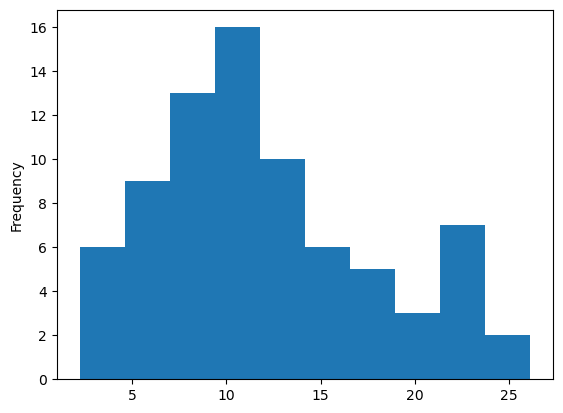

In [8]:
df[(df['total.chem.screened'] > 1000)]['active.percent'].plot(kind = 'hist')

Mean of hit rate distribution for assays where at least 1000 substances were screened

In [9]:
np.mean(df[(df['total.chem.screened'] > 1000)]['active.percent'])

12.10727272727273

Median of hit rate distribution

In [10]:
np.median(df[(df['total.chem.screened'] > 1000)]['active.percent'])

11.03

In [5]:
df2 = pd.read_excel(external_dir+'MSTI_hitrate_summaries_25Jan2023.xlsx', sheet_name = 'MSTI Chem Hit Rate' )

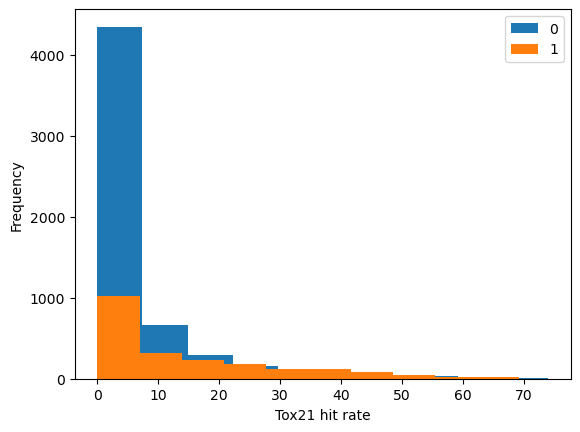

In [31]:
df2.groupby('msti_hitc')['active.percent'].plot(kind = 'hist')
plt.xlabel('Tox21 hit rate')
plt.legend()

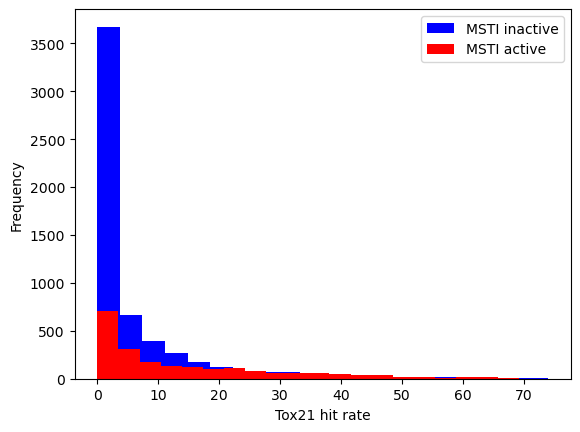

In [28]:
df2[df2['msti_hitc'] == 0]['active.percent'].plot(kind = 'hist', color = 'b', label = 'MSTI inactive', bins = 20)
df2[df2['msti_hitc'] == 1]['active.percent'].plot(kind = 'hist', color = 'r', label = 'MSTI active', bins = 20)
plt.xlabel('Tox21 hit rate')
plt.legend()

In [40]:
df2[(df2['active.percent']> 20) & (df2['msti_hitc'] == 1)]

,chid,chnm,casn,dsstox_substance_id,total.assay.screened,active.assay.count,inactive.assay.count,active.percent,inactive.percent,msti_hitc
4,57638,Nitromersol,133-58-4,DTXSID9057638,156,108,48,69.23,30.77,1
7,22384,(Z)-4-Hydroxytamoxifen,68047-06-3,DTXSID7022384,239,163,76,68.20,31.80,1
9,47900,Tetraoctylphosphonium bromide,23906-97-0,DTXSID5047900,235,159,76,67.66,32.34,1
11,47944,Trihexyltetradecylphosphonium chloride,258864-54-9,DTXSID1047944,235,158,77,67.23,32.77,1
12,47953,Trihexyltetradecylphosphonium bromide,654057-97-3,DTXSID0047953,235,158,77,67.23,32.77,1
...,...,...,...,...,...,...,...,...,...,...
1089,21836,"1,4-Dinitrobenzene",100-25-4,DTXSID0021836,503,102,401,20.28,79.72,1
1091,44995,9-Ethyl-3-nitro-9H-carbazole,86-20-4,DTXSID0044995,247,50,197,20.24,79.76,1
1092,20573,17beta-Estradiol,50-28-2,DTXSID0020573,2112,426,1682,20.17,79.64,1
1096,40464,Docetaxel,114977-28-5,DTXSID0040464,329,66,263,20.06,79.94,1


In [41]:
df2[(df2['msti_hitc'] == 1)]

,chid,chnm,casn,dsstox_substance_id,total.assay.screened,active.assay.count,inactive.assay.count,active.percent,inactive.percent,msti_hitc
4,57638,Nitromersol,133-58-4,DTXSID9057638,156,108,48,69.23,30.77,1
7,22384,(Z)-4-Hydroxytamoxifen,68047-06-3,DTXSID7022384,239,163,76,68.20,31.80,1
9,47900,Tetraoctylphosphonium bromide,23906-97-0,DTXSID5047900,235,159,76,67.66,32.34,1
11,47944,Trihexyltetradecylphosphonium chloride,258864-54-9,DTXSID1047944,235,158,77,67.23,32.77,1
12,47953,Trihexyltetradecylphosphonium bromide,654057-97-3,DTXSID0047953,235,158,77,67.23,32.77,1
...,...,...,...,...,...,...,...,...,...,...
7861,47663,1-Furfurylpyrrole,1438-94-4,DTXSID5047663,235,0,235,0.00,100.00,1
7863,44625,"N,N-Bis(2-hydroxyethyl)formamide",25209-66-9,DTXSID3044625,235,0,235,0.00,100.00,1
7865,44631,"3-Oxo-N-(2-oxo-2,3-dihydro-1H-benzimidazol-5-y...",26576-46-5,DTXSID7044631,235,0,235,0.00,100.00,1
7866,47665,Furfuryl isopropyl sulfide,1883-78-9,DTXSID5047665,235,0,235,0.00,100.00,1


msti_hitc
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: active.percent, dtype: object

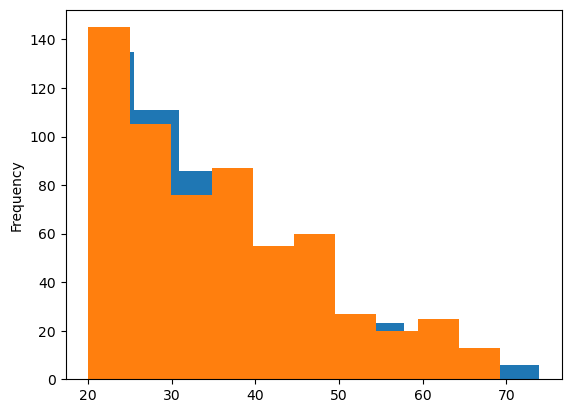

In [44]:
df2[(df2['active.percent']> 20)].groupby('msti_hitc')['active.percent'].plot(kind = 'hist')